In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
y = breast_cancer.data
x = breast_cancer.target

In [0]:
df = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)

In [0]:
df['class'] = breast_cancer.target

In [0]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train_test_split


In [0]:
from sklearn.model_selection import train_test_split as tt

In [0]:
x = df.drop('class',axis = 1)
y = df['class']

In [0]:
x_train,x_test,y_train,y_test=tt(x,y,test_size = 0.5,stratify = y,random_state = 1)

In [0]:
print(x_train.shape,y_test.shape)

(284, 30) (285,)


In [0]:
print(y_train.mean(),y.mean(),y_test.mean())

0.6267605633802817 0.6274165202108963 0.6280701754385964


In [0]:
print(x.mean(),x_train.mean(),x_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

#Binarization of input

In [0]:
import matplotlib.pyplot as plt


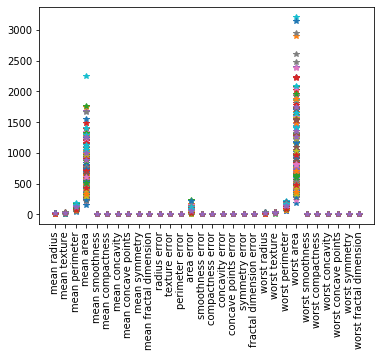

In [0]:
plt.plot(x_test.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [0]:
binx_train = x_train['mean area'].map(lambda x:0 if x <1000 else 1)

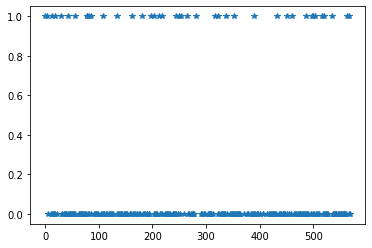

In [0]:
plt.plot(binx_train,'*')

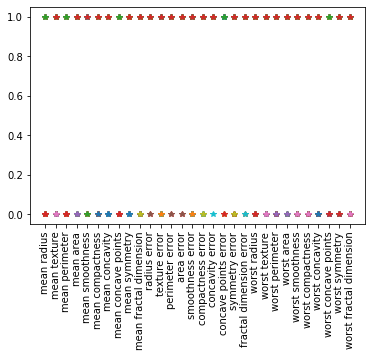

In [0]:
x_bin_train = x_train.apply(pd.cut, bins = 2 ,labels=[1,0])
x_bin_test= x_test.apply(pd.cut, bins = 2 ,labels=[1,0])
plt.plot(x_bin_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [0]:
x_bin_train = x_bin_train.values
x_bin_test= x_bin_test.values

# MP Neuron Model


In [0]:
from random import randint

In [0]:
def DSE(y,yp):
    return(np.dot((y-yp).T,(y-yp)))

In [0]:
def Acc(y,yp):
    return((list((y-yp)).count(0))/len(y))

In [0]:

for i in range(x_bin_train.shape[1] + 1):
  y_pred = []
  for x , y in zip(x_bin_train,y_train):
    if np.sum(x) >= i:
      y_pred.append(1)
    else:
      y_pred.append(0)
  print('For b = ',i,'DSE =',DSE(np.asarray(y_pred),np.asarray(y_train)),'Accuracy =',Acc(np.asarray(y_pred),np.asarray(y_train)))

For b =  0 DSE = 106 Accuracy = 0.6267605633802817
For b =  1 DSE = 106 Accuracy = 0.6267605633802817
For b =  2 DSE = 106 Accuracy = 0.6267605633802817
For b =  3 DSE = 106 Accuracy = 0.6267605633802817
For b =  4 DSE = 106 Accuracy = 0.6267605633802817
For b =  5 DSE = 106 Accuracy = 0.6267605633802817
For b =  6 DSE = 106 Accuracy = 0.6267605633802817
For b =  7 DSE = 106 Accuracy = 0.6267605633802817
For b =  8 DSE = 106 Accuracy = 0.6267605633802817
For b =  9 DSE = 106 Accuracy = 0.6267605633802817
For b =  10 DSE = 106 Accuracy = 0.6267605633802817
For b =  11 DSE = 106 Accuracy = 0.6267605633802817
For b =  12 DSE = 106 Accuracy = 0.6267605633802817
For b =  13 DSE = 105 Accuracy = 0.6302816901408451
For b =  14 DSE = 100 Accuracy = 0.647887323943662
For b =  15 DSE = 99 Accuracy = 0.6514084507042254
For b =  16 DSE = 97 Accuracy = 0.6584507042253521
For b =  17 DSE = 94 Accuracy = 0.6690140845070423
For b =  18 DSE = 90 Accuracy = 0.6830985915492958
For b =  19 DSE = 89 Accura

Now going to check the test data for accuracy


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = []
b = 28
for x in x_bin_test:
  if np.sum(x) >= b:
    y_pred.append(1)
  else:
    y_pred.append(0)
print('For b = ',b,'DSE =',DSE(np.asarray(y_pred),np.asarray(y_test)),'Accuracy =',Acc(np.asarray(y_pred),np.asarray(y_test)))
print('For b = ',b,'DSE =',DSE(np.asarray(y_pred),np.asarray(y_test)),'Accuracy =', accuracy_score(y_test,y_pred))

For b =  28 DSE = 37 Accuracy = 0.8701754385964913
For b =  28 DSE = 37 Accuracy = 0.8701754385964913


In [0]:
class MPneuron():
  def __init__(self):
    self.b = 0
  def model(self,X):
    return(np.sum(X)>=self.b)

  def predict(self,X):
    y = []
    for i in X:
      y.append(self.model(i))
    return(np.array(y))
  def fit(self,X,Y):
    acc = {}
    for b in range(X.shape[1] + 1):
      self.b = b
      y_pred = self.predict(X)
      acc[b] = accuracy_score(Y,y_pred)
    best_b = max(acc,key= acc.get)
    self.b = best_b
    print(acc)
    print('The best b is :',self.b)
    print('The optimal Accuracy is :',acc[self.b])






In [0]:
MP = MPneuron()
MP.fit(x_bin_train,y_train)


{0: 0.6267605633802817, 1: 0.6267605633802817, 2: 0.6267605633802817, 3: 0.6267605633802817, 4: 0.6267605633802817, 5: 0.6267605633802817, 6: 0.6267605633802817, 7: 0.6267605633802817, 8: 0.6267605633802817, 9: 0.6267605633802817, 10: 0.6267605633802817, 11: 0.6267605633802817, 12: 0.6267605633802817, 13: 0.6302816901408451, 14: 0.647887323943662, 15: 0.6514084507042254, 16: 0.6584507042253521, 17: 0.6690140845070423, 18: 0.6830985915492958, 19: 0.6866197183098591, 20: 0.704225352112676, 21: 0.7147887323943662, 22: 0.7323943661971831, 23: 0.7746478873239436, 24: 0.8063380281690141, 25: 0.823943661971831, 26: 0.8450704225352113, 27: 0.8556338028169014, 28: 0.8133802816901409, 29: 0.7570422535211268, 30: 0.6443661971830986}
The best b is : 27
The optimal Accuracy is : 0.8556338028169014


In [0]:
for i in x_bin_train:
  print(np.sum(i))

17
22
29
30
30
24
30
30
13
30
30
29
22
28
28
28
30
28
23
30
30
30
30
28
28
24
22
25
25
30
16
30
28
27
29
29
26
26
30
28
29
19
27
30
13
30
30
30
30
27
26
29
27
21
24
29
30
26
27
30
28
30
29
28
23
29
28
24
15
30
23
24
28
13
30
28
28
18
30
28
30
25
29
30
19
30
29
27
30
22
13
28
20
29
30
24
22
28
28
27
20
24
22
27
30
25
30
30
30
25
29
29
30
30
27
29
14
30
28
30
24
30
28
30
30
28
22
23
30
30
24
30
17
30
22
30
29
30
23
30
25
27
16
30
27
22
23
30
25
29
29
19
30
30
30
30
23
27
24
27
29
16
28
30
28
26
29
29
30
29
24
30
30
30
28
15
29
30
23
29
30
25
30
27
25
29
30
19
30
30
30
22
17
26
28
30
29
13
28
29
30
27
29
29
25
30
30
28
30
27
20
30
29
12
28
21
30
29
30
23
30
25
28
30
25
30
26
27
24
30
17
27
23
21
21
30
30
29
26
28
30
23
28
29
29
25
30
29
29
17
30
28
28
27
22
21
29
27
17
29
28
28
30
29
30
30
28
28
25
30
25
29
28
19
29
27
22
29
29
27
24
26
29
25


#Perceptron Model


In [0]:
class perceptron():
  def __init__(self):
    self.w = None
    self.b = None
    self.epoch = 1
  def model(self,x):
    return 1 if( np.dot(self.w,x) >= self.b ) else 0

  def predict(self,x):
    y_pred = []
    for i in x:
      y_pred.append(self.model(i))
    return (np.array(y_pred))

  def loss(self,y,y_hat):
    yl=[]
    for i ,j in zip(y,y_hat):
      if i != j:
        yl.append(1)
      else:
        yl.append(0)
    return(np.sum(np.array(yl)))

  def fit(self,x,y,epochs,lr= 1):
    wt_matrix = []
    acc = 0
    if (not epochs):
      epochs = self.epoch
    self.w = np.ones(x.shape[1])
    self.b = 0
    accuracy = {}
    loss = {}
    for i in range(epochs):
      for y_acc,x_case in zip(y,x):
        y_pred = self.model(x_case)
        if y_pred == 0 and y_acc == 1:
          self.w = self.w + lr * x_case
          self.b = self.b + lr * 1
        elif y_pred == 1 and y_acc == 0:
          self.w = self.w - lr * x_case
          self.b = self.b - lr * 1

        wt_matrix.append(self.w)
      

      accuracy[i] = accuracy_score(self.predict(x),y)
      loss[i] = self.loss(self.predict(x),y)
      if(accuracy[i] > acc):
        chptw = self.w
        chptb = self.b
    self.w =  chptw 
    self.b = chptb   
    plt.plot(list(accuracy.values()))
    plt.show()
    plt.plot(list(loss.values()))
    plt.show()
    self.epoch = max(accuracy,key = accuracy.get)
    print('Max accuracy at epoch: ',max(accuracy,key = accuracy.get),'With accuracy :',accuracy[max(accuracy,key = accuracy.get)])
    print('Lowest Loss at epoch: ',min(loss,key = loss.get),'With loss :',loss[min(loss,key = loss.get)])
    return(np.asarray(wt_matrix))

In [0]:
percep = perceptron()


In [0]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

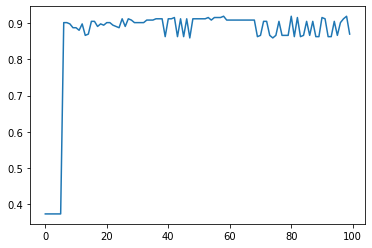

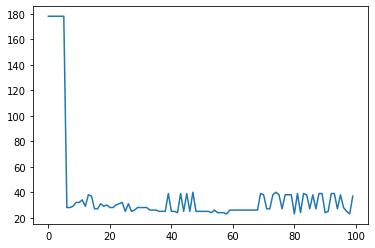

Max accuracy at epoch:  58 With accuracy : 0.9190140845070423
Lowest Loss at epoch:  58 With loss : 23


In [0]:
wt_matrix = percep.fit(x_train,y_train,100)

In [0]:
y_pred = percep.predict(np.asarray(x_test))
accuracy_score(y_test,y_pred)

0.9298245614035088

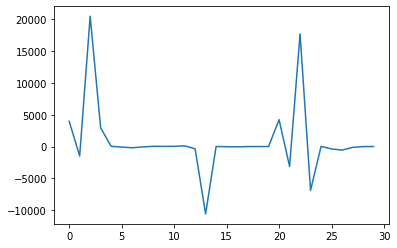

In [0]:
plt.plot(percep.w)
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

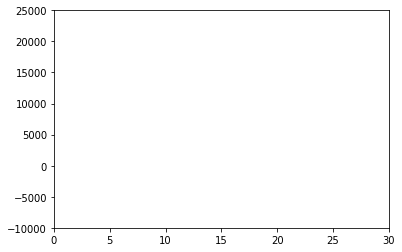

In [0]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:


# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)



In [0]:


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=1000, interval=200, blit=True)



In [0]:
HTML(anim.to_html5_video())
